In [ ]:
import numpy as np
import sys
from google.colab import drive
import matplotlib.pyplot as plt
import tensorflow as tf                  # TensorFlow
from tensorflow import keras             # high level API for TensorFlow
from sklearn.model_selection import train_test_split

drive.mount('/content/gdrive')
sys.path.insert(0,'/content/gdrive/MyDrive/C247_NNDL_Project/helper_functions')
from utils import *
from models import *

Mounted at /content/gdrive


In [ ]:
data = load_eeg_data()

X_train_valid: (2115, 1000, 22)
y_train_valid: (2115,)
X_test: (443, 1000, 22)
y_test: (443,)


In [ ]:
CUTOFFS = [0.1, 0.25, 0.4]
accuracies = []

for CUTOFF in CUTOFFS:
  SUB_SAMPLE = 2
  X_train, X_valid, y_train, y_valid = train_test_split(data['X_train_valid'], data['y_train_valid'], test_size=0.2)
  X_train, y_train = augment_data(X_train, y_train, cutoff=CUTOFF, sub_sample=SUB_SAMPLE)
  X_valid, y_valid = augment_data(X_valid, y_valid, cutoff=CUTOFF, sub_sample=SUB_SAMPLE, noise=False, filter=False, max_pool=False, avg_pool=False)
  X_test, y_test = augment_data(data['X_test'], data['y_test'], cutoff=CUTOFF, sub_sample=SUB_SAMPLE, noise=False, filter=False, max_pool=False, avg_pool=False)

  X_train = np.expand_dims(X_train, axis = -1)
  X_valid = np.expand_dims(X_valid, axis = -1)
  X_test = np.expand_dims(X_test, axis = -1)
  X_train = np.transpose(X_train, (0, 1, 3, 2))
  X_valid = np.transpose(X_valid, (0, 1, 3, 2))
  X_test = np.transpose(X_test, (0, 1, 3, 2))
  train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
  valid = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
  test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

  batch_size = 512

  # batch and shuffle
  train = train.shuffle(1024).batch(batch_size)
  valid = valid.shuffle(1024).batch(batch_size)
  test = test.shuffle(1024).batch(batch_size)

  input_shape = X_train.shape[1:]
  eeg_model = eeg_CNN_Model(input_shape, False)

  cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=40,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
  )
  EPOCHS = 300

  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate=0.005,
      decay_steps=20,
      decay_rate=0.98,
      staircase=True)

  loss_fn = keras.losses.SparseCategoricalCrossentropy()
  opt = keras.optimizers.Adam(learning_rate=lr_schedule)

  eeg_model.compile(optimizer=opt, loss=loss_fn, metrics='accuracy')

  history = eeg_model.fit(x=train, validation_data=valid, epochs=EPOCHS, callbacks=cb, verbose=False)

  accuracy = eeg_model.evaluate(test)[1]

Restoring model weights from the end of the best epoch: 70.
Epoch 110: early stopping
1/1 [==============================] - 0s 43ms/step - loss: 1.0902 - accuracy: 0.5260
Restoring model weights from the end of the best epoch: 173.
Epoch 213: early stopping
1/1 [==============================] - 0s 83ms/step - loss: 0.7913 - accuracy: 0.6998
Restoring model weights from the end of the best epoch: 84.
Epoch 124: early stopping
1/1 [==============================] - 0s 136ms/step - loss: 0.7952 - accuracy: 0.6975


In [ ]:
CUTOFFS = [0.70, 0.85, 1.0]

for CUTOFF in CUTOFFS:
  SUB_SAMPLE = 2
  X_train, X_valid, y_train, y_valid = train_test_split(data['X_train_valid'], data['y_train_valid'], test_size=0.2)
  X_train, y_train = augment_data(X_train, y_train, cutoff=CUTOFF, sub_sample=SUB_SAMPLE)
  X_valid, y_valid = augment_data(X_valid, y_valid, cutoff=CUTOFF, sub_sample=SUB_SAMPLE, noise=False, filter=False, max_pool=False, avg_pool=False)
  X_test, y_test = augment_data(data['X_test'], data['y_test'], cutoff=CUTOFF, sub_sample=SUB_SAMPLE, noise=False, filter=False, max_pool=False, avg_pool=False)

  X_train = np.expand_dims(X_train, axis = -1)
  X_valid = np.expand_dims(X_valid, axis = -1)
  X_test = np.expand_dims(X_test, axis = -1)
  X_train = np.transpose(X_train, (0, 1, 3, 2))
  X_valid = np.transpose(X_valid, (0, 1, 3, 2))
  X_test = np.transpose(X_test, (0, 1, 3, 2))
  train = tf.data.Dataset.from_tensor_slices((X_train, y_train))
  valid = tf.data.Dataset.from_tensor_slices((X_valid, y_valid))
  test = tf.data.Dataset.from_tensor_slices((X_test, y_test))

  batch_size = 512

  # batch and shuffle
  train = train.shuffle(1024).batch(batch_size)
  valid = valid.shuffle(1024).batch(batch_size)
  test = test.shuffle(1024).batch(batch_size)

  input_shape = X_train.shape[1:]
  eeg_model = eeg_CNN_Model(input_shape, False)

  cb = tf.keras.callbacks.EarlyStopping(
    monitor="val_accuracy",
    min_delta=0,
    patience=40,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
  )
  EPOCHS = 300

  lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
      initial_learning_rate=0.005,
      decay_steps=20,
      decay_rate=0.98,
      staircase=True)

  loss_fn = keras.losses.SparseCategoricalCrossentropy()
  opt = keras.optimizers.Adam(learning_rate=lr_schedule)

  eeg_model.compile(optimizer=opt, loss=loss_fn, metrics='accuracy')

  history = eeg_model.fit(x=train, validation_data=valid, epochs=EPOCHS, callbacks=cb, verbose=False)

  accuracy = eeg_model.evaluate(test)[1]

Restoring model weights from the end of the best epoch: 168.
Epoch 208: early stopping
1/1 [==============================] - 0s 217ms/step - loss: 0.7639 - accuracy: 0.7156
Restoring model weights from the end of the best epoch: 121.
Epoch 161: early stopping
1/1 [==============================] - 0s 248ms/step - loss: 0.7975 - accuracy: 0.6998
Restoring model weights from the end of the best epoch: 199.
Epoch 239: early stopping
1/1 [==============================] - 0s 306ms/step - loss: 0.7754 - accuracy: 0.7675


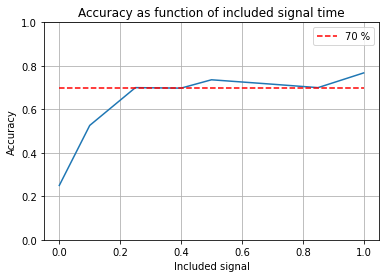

In [ ]:
cutoffs = [0, 0.1, 0.25, 0.4, 0.5, 0.7, 0.85, 1]
accs = [0.25, 0.5260, 0.6998, 0.6975, 0.7359, 0.7156, 0.6998, 0.7675]
dashed = [0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7, 0.7]
plt.plot(cutoffs, accs)
plt.plot(cutoffs, dashed, '--r', label="70 %")
plt.legend()
plt.title("Accuracy as function of included signal time")
plt.ylabel("Accuracy")
plt.xlabel("Included signal")
plt.ylim(0, 1)
plt.grid()

In [ ]:
# 0.10 -> 0.5260
# 0.25 -> 0.6998
# 0.40 -> 0.6975
# 0.50 -> 0.7359
# 0.70 -> 0.7156
# 0.85 -> 0.6998
# 1.00 -> 0.7675